In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm




In [2]:
data=pd.read_csv('churn_modelling.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.mean()

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [6]:
data.median()

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.kurt(axis=1,skipna=True)

0       10.998778
1       10.997909
2       10.995886
3       10.998962
4       10.997675
          ...    
9995    10.998908
9996    10.998551
9997    10.999788
9998    10.998530
9999    10.997973
Length: 10000, dtype: float64

In [10]:
data.kurt(axis=0,skipna=True)

RowNumber         -1.200000
CustomerId        -1.196113
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

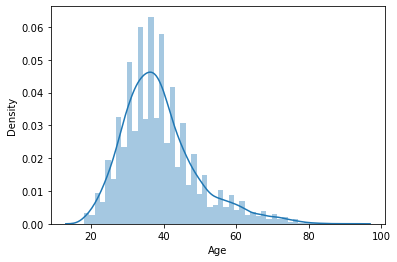

In [11]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

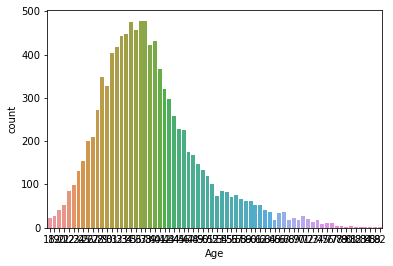

In [12]:
sns.countplot(data['Age'])

In [13]:
data.skew(axis=0,skipna=True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [14]:
data.skew(axis=1,skipna=True)

0       3.316373
1       3.316193
2       3.315777
3       3.316411
4       3.316145
          ...   
9995    3.316399
9996    3.316325
9997    3.316581
9998    3.316321
9999    3.316207
Length: 10000, dtype: float64

In [15]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
data.duplicated().sum()

0

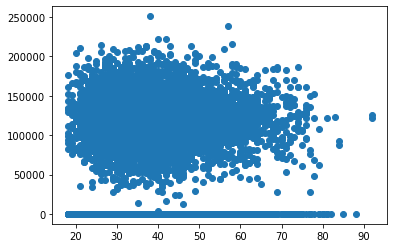

In [19]:
plt.scatter(data.Age,data.Balance)

<AxesSubplot:xlabel='Age', ylabel='Balance'>

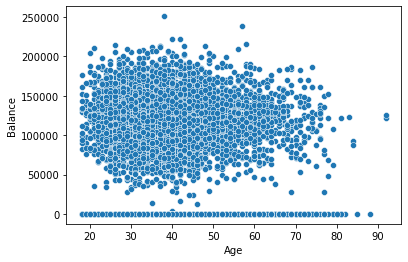

In [20]:
sns.scatterplot(x=data.Age,y=data.Balance)

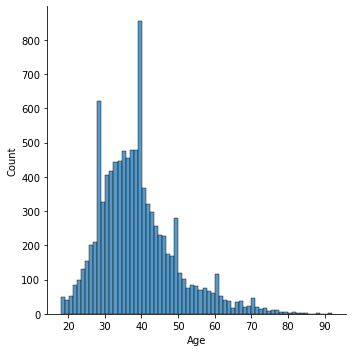

In [21]:
sns.displot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

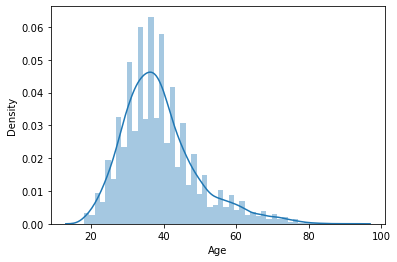

In [22]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

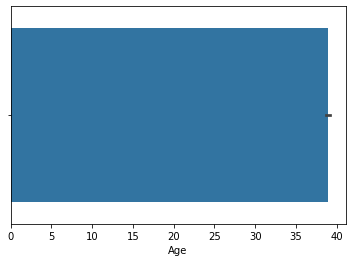

In [23]:
sns.barplot(data['Age'])

<AxesSubplot:xlabel='CustomerId'>

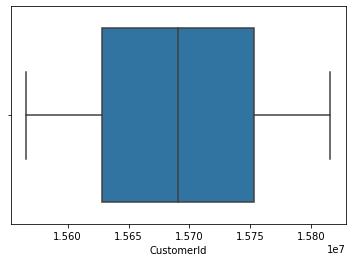

In [24]:
sns.boxplot(data['CustomerId'])

In [25]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

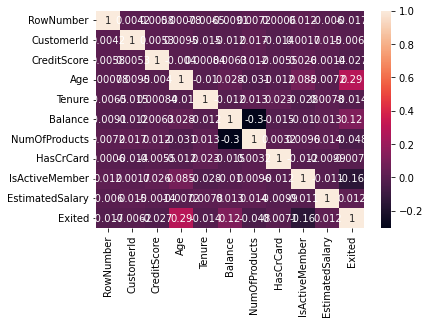

In [26]:
sns.heatmap(data.corr(),annot=True)

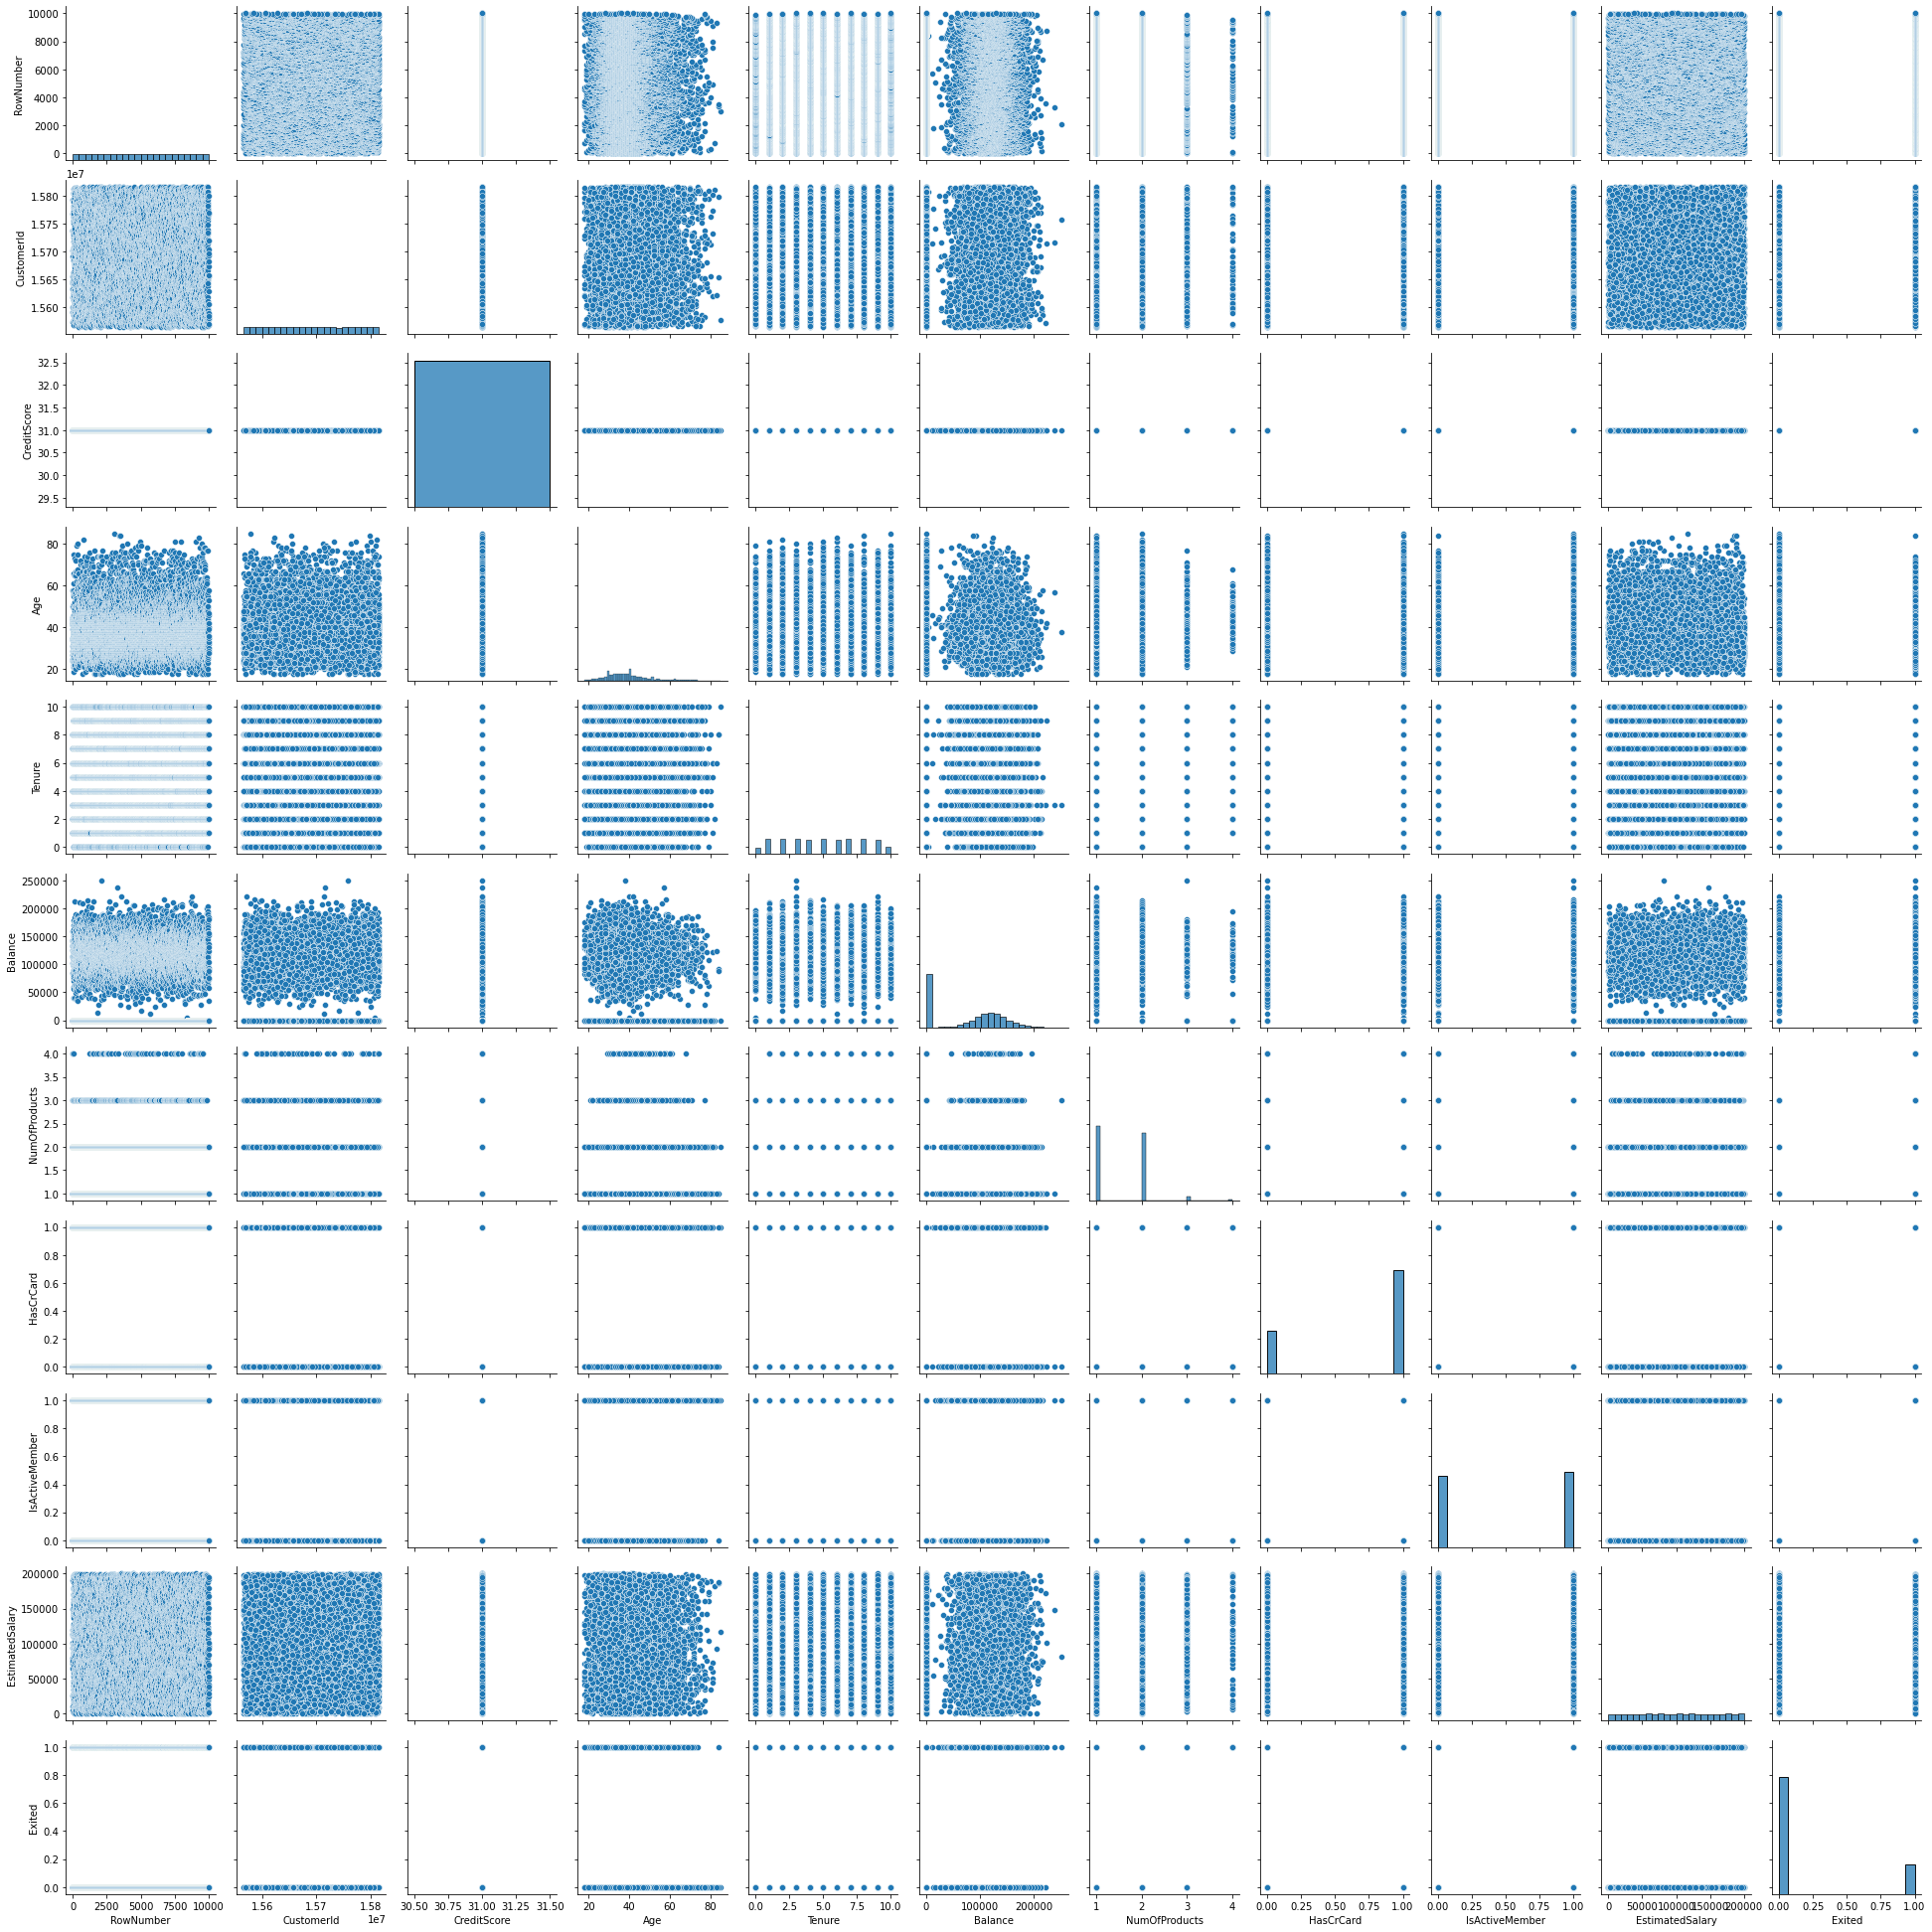

In [75]:
sns.pairplot(data)

In [29]:
x=data.iloc[:,:-1].values

In [30]:
x

array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [31]:
y=data.iloc[:,4].values

In [32]:
y

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [33]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<AxesSubplot:>

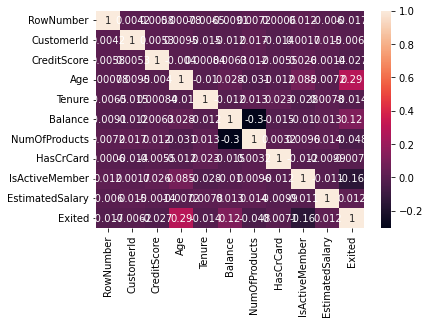

In [34]:
sns.heatmap(data.corr(),annot=True)

In [35]:
x=data[["EstimatedSalary"]]
y=data['CreditScore']

In [36]:
model=sm.OLS(y,x)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            CreditScore   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.735
Method:                 Least Squares   F-statistic:                          2.779e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:21:32   Log-Likelihood:                         -72429.
No. Observations:               10000   AIC:                                  1.449e+05
Df Residuals:                    9999   BIC:                                  1.449e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
EstimatedSalary     0.0049   2.93e-05    166.705      0.000       0.005       0.005
==============================================================================
Omnibus:                     1758.359   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.161
Skew:                           0.004   Prob(JB):                     2.08e-82
Kurtosis:                       2.050   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

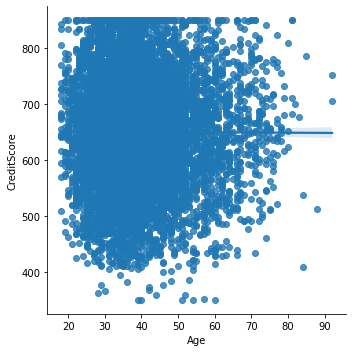

In [48]:
sns.lmplot(data=data,x="Age",y="CreditScore")

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

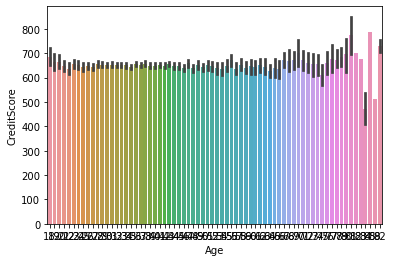

In [45]:
sns.barplot(x='Age',y='CreditScore',data=data)

In [50]:
qnt=data.quantile(q=(0.25,0.75))

In [51]:
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [52]:
iqr=qnt.loc[0.25]-qnt.loc[0.75]

In [53]:
iqr

RowNumber           -4999.5000
CustomerId        -124705.5000
CreditScore          -134.0000
Age                   -12.0000
Tenure                 -4.0000
Balance           -127644.2400
NumOfProducts          -1.0000
HasCrCard              -1.0000
IsActiveMember         -1.0000
EstimatedSalary    -98386.1375
Exited                  0.0000
dtype: float64

In [54]:
lower=qnt.loc[0.25]-1.5*iqr

In [55]:
lower

RowNumber          1.000000e+04
CustomerId         1.581559e+07
CreditScore        7.850000e+02
Age                5.000000e+01
Tenure             9.000000e+00
Balance            1.914664e+05
NumOfProducts      2.500000e+00
HasCrCard          1.500000e+00
IsActiveMember     1.500000e+00
EstimatedSalary    1.985813e+05
Exited             0.000000e+00
dtype: float64

In [70]:
data['Age']=np.where(data['Age']>87,40,data['Age'])

In [71]:
data['Balance']=np.where(data['Balance']>618,316,data['Balance'])

<AxesSubplot:xlabel='Balance'>

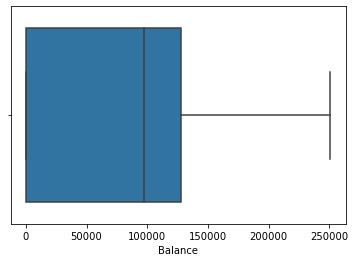

In [76]:
sns.boxplot(data['Balance'])

In [77]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,31,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,31,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [84]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [86]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,31,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,31,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,31,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,31,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,31,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,31,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,31,France,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,31,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,31,France,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,31,France,1,27,2,134603.88,1,1,1,71725.73,0


In [90]:
data['HasCrCard'].replace({1:'YES',0:'NO'},inplace=True)

In [91]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,31,France,0,42,2,0.00,1,YES,1,101348.88,1
1,2,15647311,Hill,31,Spain,0,41,1,83807.86,1,NO,1,112542.58,0
2,3,15619304,Onio,31,France,0,42,8,159660.80,3,YES,0,113931.57,1
3,4,15701354,Boni,31,France,0,39,1,0.00,2,NO,0,93826.63,0
4,5,15737888,Mitchell,31,Spain,0,43,2,125510.82,1,YES,1,79084.10,0
5,6,15574012,Chu,31,Spain,1,44,8,113755.78,2,YES,0,149756.71,1
6,7,15592531,Bartlett,31,France,1,50,7,0.00,2,YES,1,10062.80,0
7,8,15656148,Obinna,31,Germany,0,29,4,115046.74,4,YES,0,119346.88,1
8,9,15792365,He,31,France,1,44,4,142051.07,2,NO,1,74940.50,0
9,10,15592389,H?,31,France,1,27,2,134603.88,1,YES,1,71725.73,0


In [92]:
from sklearn.preprocessing import OneHotEncoder

In [102]:

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(data[['Age']])

In [103]:
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,18,19,20,21,22,23,24,25,26,27,...,76,77,78,79,80,81,82,83,84,85
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
y=data['Age']

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
data['Age']=le.fit_transform(data['Age'])

In [117]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,31,France,0,24,2,0.00,1,YES,1,101348.88,1
1,2,15647311,Hill,31,Spain,0,23,1,83807.86,1,NO,1,112542.58,0
2,3,15619304,Onio,31,France,0,24,8,159660.80,3,YES,0,113931.57,1
3,4,15701354,Boni,31,France,0,21,1,0.00,2,NO,0,93826.63,0
4,5,15737888,Mitchell,31,Spain,0,25,2,125510.82,1,YES,1,79084.10,0
5,6,15574012,Chu,31,Spain,1,26,8,113755.78,2,YES,0,149756.71,1
6,7,15592531,Bartlett,31,France,1,32,7,0.00,2,YES,1,10062.80,0
7,8,15656148,Obinna,31,Germany,0,11,4,115046.74,4,YES,0,119346.88,1
8,9,15792365,He,31,France,1,26,4,142051.07,2,NO,1,74940.50,0
9,10,15592389,H?,31,France,1,9,2,134603.88,1,YES,1,71725.73,0


In [112]:
data.Age.unique()

array([24, 23, 21, 25, 26, 32, 11,  9, 13,  6, 16,  7, 17, 27, 40, 14, 20,
       28, 18, 15, 22, 33, 43, 31, 19,  1, 48, 38,  8,  3, 37, 57,  4, 12,
       10, 47, 30, 34, 39, 55, 29, 36, 54,  2, 49, 61, 44, 35, 62, 41, 50,
        5, 42, 52, 45, 46,  0, 64, 51, 56, 53, 58, 59, 67, 66, 60, 63, 65],
      dtype=int64)

In [128]:
x=data.iloc[:,0:13].values

In [129]:
x

array([[1, 15634602, 'Hargrave', ..., 'YES', 1, 101348.88],
       [2, 15647311, 'Hill', ..., 'NO', 1, 112542.58],
       [3, 15619304, 'Onio', ..., 'YES', 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 'NO', 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 'YES', 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 'YES', 0, 38190.78]], dtype=object)

In [130]:
y=data.iloc[:,13:14].values

In [131]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [133]:
from sklearn. preprocessing import OneHotEncoder

In [134]:
ohe=OneHotEncoder()

In [137]:
z=ohe.fit_transform(x[:,0:14]).toarray()

In [138]:
z

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
##split


In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [143]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 13), (2000, 13), (8000, 1), (2000, 1))

In [144]:
x_train

array([[7390, 15676909, 'Mishin', ..., 'YES', 0, 163830.64],
       [9276, 15749265, 'Carslaw', ..., 'YES', 1, 57098.0],
       [2996, 15582492, 'Moore', ..., 'YES', 0, 185630.76],
       ...,
       [3265, 15574372, 'Hoolan', ..., 'YES', 0, 181429.87],
       [9846, 15664035, 'Parsons', ..., 'YES', 1, 148750.16],
       [2733, 15592816, 'Udokamma', ..., 'YES', 0, 118855.26]],
      dtype=object)

In [145]:
x_test

array([[9395, 15615753, 'Upchurch', ..., 'YES', 1, 192852.67],
       [899, 15654700, 'Fallaci', ..., 'YES', 0, 128702.1],
       [2399, 15633877, 'Morrison', ..., 'YES', 1, 75732.25],
       ...,
       [9550, 15772604, 'Chiemezie', ..., 'YES', 0, 141533.19],
       [2741, 15787699, 'Burke', ..., 'YES', 1, 11276.48],
       [6691, 15579223, 'Niu', ..., 'YES', 0, 192950.6]], dtype=object)

In [146]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [147]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [148]:
from sklearn.preprocessing import scale

In [156]:
x=data['Balance']

In [157]:
S=scale(x)

In [158]:
S

array([-1.22584767,  0.11735002,  1.33305335, ..., -1.22584767,
       -0.02260751,  0.85996499])

In [159]:
###independent variables

In [164]:
w=data.drop(data['Age'],axis=0)

In [165]:
w

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
68,69,15638424,Glauert,31,Germany,0,17,5,150725.53,2,NO,1,113656.85,0
69,70,15755648,Pisano,31,France,0,3,8,98373.26,1,YES,0,18203.00,0
70,71,15703793,Konovalova,31,Germany,1,40,2,133745.44,4,YES,0,28373.86,1
71,72,15620344,McKee,31,France,1,11,6,0.00,1,YES,0,33953.87,0
72,73,15812518,Palermo,31,Spain,0,19,0,163607.18,1,NO,1,44203.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,31,France,1,21,5,0.00,2,YES,0,96270.64,0
9996,9997,15569892,Johnstone,31,France,1,17,10,57369.61,1,YES,1,101699.77,0
9997,9998,15584532,Liu,31,France,0,18,7,0.00,1,NO,1,42085.58,1
9998,9999,15682355,Sabbatini,31,Germany,1,24,3,75075.31,2,YES,0,92888.52,1


In [167]:
y=data.iloc[:,-1].values

In [168]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)